CODE BLOCK: 1

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net
import utils

CODE BLOCK: 2

In [17]:
# CUDA?
device = utils.get_device()

CUDA Available? False


CODE BLOCK: 3

In [18]:
# Train data transformations
train_transforms = utils.transform_train_data(transforms)
# Test data transformations
test_transforms = utils.transform_test_data(transforms)


CODE BLOCK: 4

In [19]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [20]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

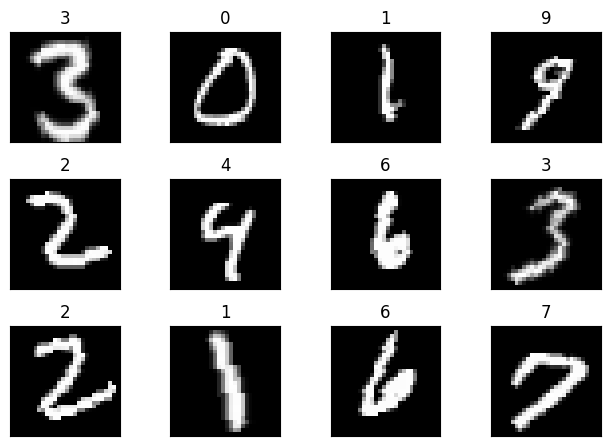

In [21]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [27]:
 model = Net().to(device)

CODE BLOCK: 8

In [28]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [29]:

#Util


CODE BLOCK: 10

In [32]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 2

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utils.train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
  scheduler.step()
  utils.test(model, device, test_loader, criterion, test_losses, test_acc)


Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4722 Batch_id=117 Accuracy=38.28: 100%|██████████| 118/118 [04:19<00:00,  2.20s/it]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0007, Accuracy: 8984/10000 (89.84%)

Epoch 2


Train: Loss=0.1405 Batch_id=117 Accuracy=91.99: 100%|██████████| 118/118 [04:12<00:00,  2.14s/it]

Adjusting learning rate of group 0 to 1.0000e-02.


Test set: Average loss: 0.0002, Accuracy: 9671/10000 (96.71%)



# New section

CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

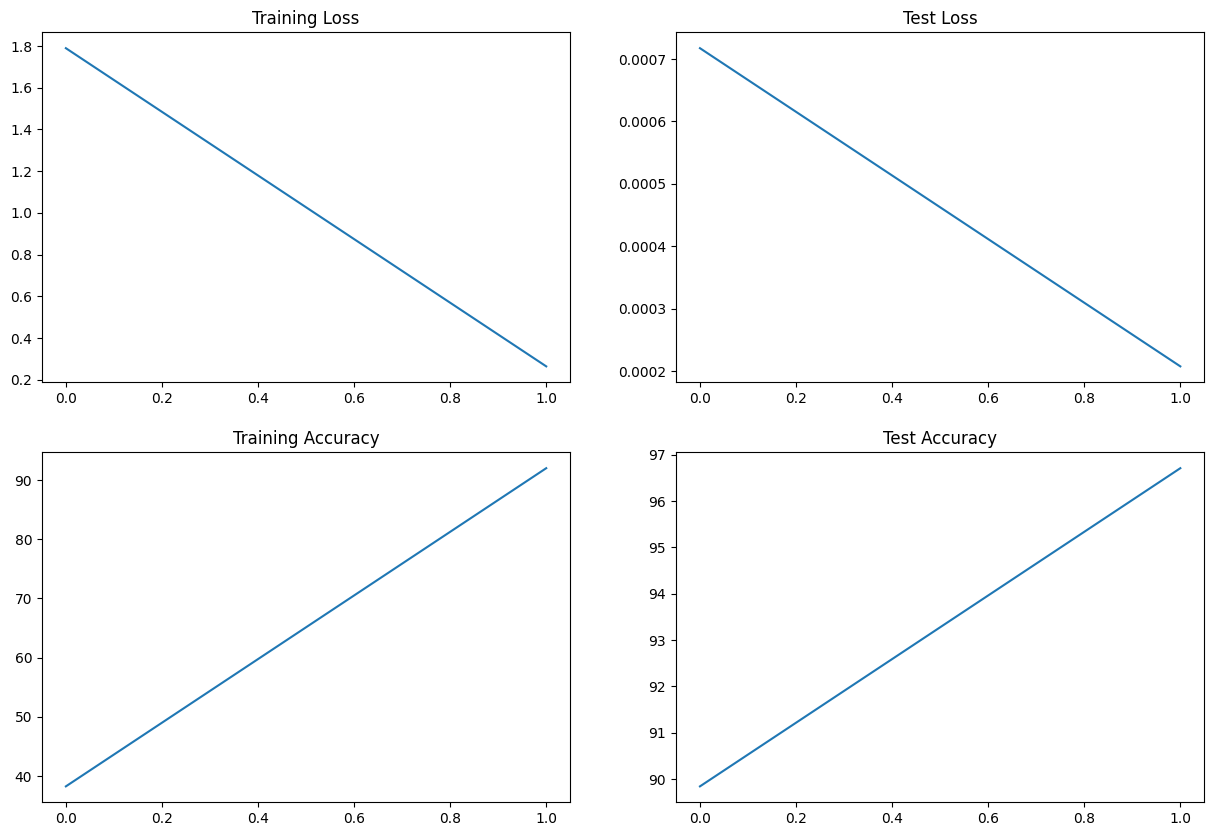

In [33]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [35]:
!pip install torchsummary
from torchsummary import summary
#use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
